# 1. data

* movielens
* https://grouplens.org/datasets/movielens/100k/
* readme for more info

## 1.1 download data and check

In [1]:
import numpy as np
import pandas as pd
header = ['user_id','item_id','rating','timestamp']
src_data = pd.read_csv('ml-100k/u.data',sep = '\t',names = header)
src_data.head() 

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [2]:
src_data.shape

(100000, 4)

In [3]:
src_data.user_id.nunique()                    #查看用户去重个数

943

In [4]:
src_data.item_id.nunique()                    #查看物品去重个数

1682

## 1.2 check item_id and item_name

In [5]:
def read_item_names():
    """
    获取电影名到电影id 和 电影id到电影名的映射
    """
    file_name = ('ml-100k/u.item')
    rid_to_name = {}
    name_to_rid = {}
    with open(file_name, 'r', encoding='ISO-8859-1') as f:
        for line in f:
            line = line.split('|')
            rid_to_name[line[0]] = line[1]
            name_to_rid[line[1]] = line[0]
    return rid_to_name, name_to_rid

In [6]:
rid_to_name, name_to_rid = read_item_names()

In [7]:
rid_to_name['242']# 242号电影的名字

'Kolya (1996)'

In [8]:
rid_to_name['302']# 302号电影的名字

'L.A. Confidential (1997)'

## 1.3 basic statistic analysis


* https://blog.csdn.net/u013527419/article/details/53264741

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
%matplotlib inline 

# 读入数据
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,encoding='latin-1')

m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url'] 
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),encoding='latin-1') 

### 1.3.1 数据融合

In [10]:
# 数据融合
movie_ratings = pd.merge(movies, ratings) 
lens = pd.merge(movie_ratings, users)
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076


### 1.3.2 列出被评价过次数最多的20部电影

* 按照电影标题将数据集分为不同的groups，并且用size( )函数得到每部电影的个数（即每部电影被评论的次数），按照从大到小排序，取最大的前20部电影列出如下：

In [11]:
most_rated = lens.groupby('title').size().sort_values(ascending=False)[:20]
print(most_rated)


'''此语句等价于SQL中的：

SELECT title, count(1)
FROM lens
GROUP BY title
ORDER BY 2 DESC
LIMIT 20;
'''

title
Star Wars (1977)                    583
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     367
Star Trek: First Contact (1996)     365
dtype: int64


'此语句等价于SQL中的：\n\nSELECT title, count(1)\nFROM lens\nGROUP BY title\nORDER BY 2 DESC\nLIMIT 20;\n'

### 1.3.3 评分最高的十部电影 
 * 按照电影名称分组，用agg函数通过一个字典{‘rating’: [np.size, np.mean]}来按照key即rating这一列聚合，查看每一部电影被评论过的次数和被打的平均分。取出至少被评论过100次的电影按照平均评分从大到小排序，取最大的10部电影。


In [12]:
movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]})
atleast_100 = movie_stats['rating']['size'] >= 100
print( movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:10] )

'''上述语句等价于SQL中的：

SELECT title, COUNT(1) size, AVG(rating) mean
FROM lens
GROUP BY title
HAVING COUNT(1) >= 100
ORDER BY 3 DESC
LIMIT 10;'''

                                 rating          
                                   size      mean
title                                            
Close Shave, A (1995)               112  4.491071
Schindler's List (1993)             298  4.466443
Wrong Trousers, The (1993)          118  4.466102
Casablanca (1942)                   243  4.456790
Shawshank Redemption, The (1994)    283  4.445230
Rear Window (1954)                  209  4.387560
Usual Suspects, The (1995)          267  4.385768
Star Wars (1977)                    583  4.358491
12 Angry Men (1957)                 125  4.344000
Citizen Kane (1941)                 198  4.292929


'上述语句等价于SQL中的：\n\nSELECT title, COUNT(1) size, AVG(rating) mean\nFROM lens\nGROUP BY title\nHAVING COUNT(1) >= 100\nORDER BY 3 DESC\nLIMIT 10;'

### 1.3.4 查看用户的年龄分布

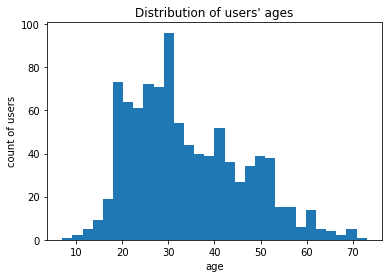

In [13]:
users.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

### 1.3.5 用pandas.cut函数将用户年龄分组

In [14]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,60,60-69
397,21,20-29
459,33,30-39
524,30,30-39
782,23,20-29
995,29,20-29
1229,26,20-29
1664,31,30-39
1942,24,20-29
2270,32,30-39


### 1.3.6 每个年龄段用户评分人数和打分偏好，看起来年轻人更挑剔一点点

In [15]:
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

# 2. install surprise

In [3]:
! pip install surprise

  Using cached https://files.pythonhosted.org/packages/61/de/e5cba8682201fcf9c3719a6fdda95693468ed061945493dea2dd37c5618b/surprise-0.1-py2.py3-none-any.whl
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# 3. surprise basic

## 3.1 load self data and check

In [16]:
from surprise import Dataset

# 默认载入movielens数据集
data = Dataset.load_builtin('ml-100k')

In [17]:
trainset = data.build_full_trainset()# 转换成这种结构，才能获取到数据集详细信息
trainset.n_users# 用户数

943

In [18]:
trainset.n_items#电影数

1682

**Trainset details**
* https://surprise.readthedocs.io/en/v1.0.0/_modules/surprise/dataset.html

**trainset.ur**

* ur(:obj:`defaultdict` of :obj:`list`): A dictionary containing lists of
* tuples of the form ``(item_inner_id, rating)``. Keys are user innerids.  ``ur`` stands for *user ratings*.


* raw_id: pandas data frame id
* inner_id: item id

In [19]:
# get raw id
toy_story_raw_id = name_to_rid['Kolya (1996)']
print('raw id=',toy_story_raw_id)

raw id= 242


In [20]:
# get inner id by raw id
toy_story_inner_id = trainset.to_inner_iid('302')
print('inner id=',toy_story_inner_id)

inner id= 1


In [21]:
for item_inner_id, rating in trainset.ur[186]:
    if(item_inner_id==toy_story_inner_id):
        print(rating)

In [22]:
trainset.n_users# 用户数

943

In [23]:
trainset.n_items#电影数

1682

## 3.2 load local data

In [24]:
import os
from surprise import Dataset, Reader

# 指定文件所在路径
file_path = os.path.expanduser('ml-100k/u.data')
# 告诉文本阅读器，文本的格式是怎么样的
reader = Reader(line_format='user item rating timestamp', sep='\t')
# 加载数据
data2 = Dataset.load_from_file(file_path, reader=reader)

## 3.3 basic example

In [25]:
from surprise import SVD
from surprise import Dataset, print_perf
from surprise.model_selection import cross_validate

# 默认载入movielens数据集
data = Dataset.load_builtin('ml-100k')
algo = SVD()
# 在数据集上测试一下效果
perf = cross_validate(algo, data, measures=['RMSE'], cv=3)# RMSE（均方根误差）
#输出结果
print_perf(perf)

        Fold 1  Fold 2  Fold 3  Mean    
TEST_RMSE0.9483  0.9480  0.9410  0.9458  
FIT_TIME5.4683  5.3993  5.1853  5.3510  
TEST_TIME0.3570  0.3420  0.3430  0.3474  


## 3.4 recommendation example

In [26]:
from collections import defaultdict

from surprise import SVD
from surprise import Dataset


def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    # uid： 用户ID
    # iid： item ID
    # est：估计得分
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    # 为每一个用户都寻找K个得分最高的item
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


# First train an SVD algorithm on the movielens dataset.
data = Dataset.load_builtin('ml-100k')
trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

196 ['50', '357', '178', '169', '98', '483', '174', '172', '318', '22']
186 ['496', '483', '657', '64', '427', '603', '191', '523', '423', '194']
22 ['12', '357', '179', '183', '513', '408', '223', '963', '64', '302']
244 ['275', '137', '654', '285', '98', '427', '136', '187', '223', '199']
166 ['318', '50', '408', '357', '174', '169', '83', '64', '114', '173']
298 ['408', '272', '169', '64', '191', '963', '12', '663', '114', '513']
115 ['483', '179', '276', '134', '408', '285', '474', '175', '135', '180']
253 ['178', '169', '170', '313', '143', '408', '189', '604', '923', '528']
305 ['661', '513', '194', '694', '1449', '211', '493', '320', '303', '213']
6 ['114', '603', '900', '647', '657', '654', '179', '923', '48', '316']
62 ['272', '223', '178', '488', '513', '603', '187', '661', '246', '520']
286 ['515', '528', '654', '197', '474', '318', '603', '735', '1147', '114']
200 ['603', '427', '480', '64', '513', '659', '12', '114', '479', '519']
210 ['480', '169', '513', '661', '64', '27

653 ['408', '615', '169', '173', '513', '251', '297', '190', '316', '189']
655 ['169', '408', '114', '180', '493', '488', '1449', '613', '136', '482']
649 ['64', '318', '357', '408', '172', '483', '169', '174', '520', '22']
658 ['64', '12', '657', '114', '427', '187', '272', '513', '285', '357']
656 ['127', '178', '408', '603', '114', '64', '511', '100', '98', '169']
660 ['275', '408', '114', '169', '194', '963', '12', '513', '187', '127']
659 ['166', '641', '923', '515', '318', '408', '169', '480', '427', '12']
646 ['480', '318', '603', '357', '127', '285', '187', '114', '657', '408']
663 ['169', '172', '511', '178', '185', '483', '515', '705', '480', '528']
664 ['474', '511', '357', '178', '114', '493', '189', '488', '1449', '251']
657 ['318', '98', '357', '178', '513', '515', '169', '603', '191', '64']
665 ['169', '318', '178', '408', '187', '114', '519', '64', '654', '316']
666 ['59', '408', '488', '475', '285', '923', '178', '60', '481', '165']
661 ['483', '12', '519', '205', '114

907 ['242', '474', '194', '603', '1137', '515', '512', '165', '480', '498']
905 ['50', '318', '64', '12', '190', '174', '408', '169', '513', '173']
902 ['169', '174', '12', '427', '64', '173', '98', '496', '603', '216']
898 ['64', '127', '408', '513', '187', '114', '603', '654', '480', '191']
895 ['172', '174', '178', '483', '169', '963', '408', '12', '480', '64']
906 ['64', '318', '169', '357', '480', '513', '178', '427', '190', '12']
900 ['50', '408', '496', '178', '513', '657', '199', '114', '603', '482']
908 ['169', '178', '64', '272', '191', '285', '408', '313', '190', '114']
916 ['127', '169', '408', '654', '178', '187', '285', '357', '199', '1449']
911 ['169', '408', '12', '488', '198', '251', '513', '114', '963', '10']
912 ['408', '272', '527', '22', '313', '480', '603', '170', '511', '515']
914 ['357', '318', '50', '527', '172', '22', '190', '169', '64', '132']
918 ['169', '114', '483', '285', '408', '515', '251', '189', '178', '134']
919 ['427', '8', '483', '127', '132', '496

In [27]:
testset

[('196', '302', 3.52986),
 ('196', '377', 3.52986),
 ('196', '51', 3.52986),
 ('196', '346', 3.52986),
 ('196', '474', 3.52986),
 ('196', '265', 3.52986),
 ('196', '465', 3.52986),
 ('196', '451', 3.52986),
 ('196', '86', 3.52986),
 ('196', '1014', 3.52986),
 ('196', '222', 3.52986),
 ('196', '40', 3.52986),
 ('196', '29', 3.52986),
 ('196', '785', 3.52986),
 ('196', '387', 3.52986),
 ('196', '274', 3.52986),
 ('196', '1042', 3.52986),
 ('196', '1184', 3.52986),
 ('196', '392', 3.52986),
 ('196', '486', 3.52986),
 ('196', '144', 3.52986),
 ('196', '118', 3.52986),
 ('196', '1', 3.52986),
 ('196', '546', 3.52986),
 ('196', '95', 3.52986),
 ('196', '768', 3.52986),
 ('196', '277', 3.52986),
 ('196', '234', 3.52986),
 ('196', '246', 3.52986),
 ('196', '98', 3.52986),
 ('196', '193', 3.52986),
 ('196', '88', 3.52986),
 ('196', '194', 3.52986),
 ('196', '1081', 3.52986),
 ('196', '603', 3.52986),
 ('196', '796', 3.52986),
 ('196', '32', 3.52986),
 ('196', '16', 3.52986),
 ('196', '304', 3.5

## 3.4 load self data and predict

check `mydata.csv` data format firt

### 3.4.1 loda data and test

In [30]:
from surprise import SVD
from surprise import Dataset, print_perf, Reader
from surprise.model_selection import cross_validate
import os

# 指定文件所在路径
file_path = os.path.expanduser('mydata.csv')
# 告诉文本阅读器，文本的格式是怎么样的
reader = Reader(line_format='user item rating', sep=',')
# 加载数据
data = Dataset.load_from_file(file_path, reader=reader)
algo = SVD()
# 在数据集上测试一下效果
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3)
#输出结果
print_perf(perf)

        Fold 1  Fold 2  Fold 3  Mean    
TEST_RMSE1.5793  1.0926  1.4464  1.3728  
TEST_MAE1.3290  0.8307  1.3291  1.1629  
FIT_TIME0.0050  0.0060  0.0030  0.0047  
TEST_TIME0.0010  0.0010  0.0000  0.0007  


### 3.4.2 load data and train model

In [31]:
from surprise import SVD
from surprise import Dataset, print_perf, Reader
from surprise.model_selection import cross_validate
import os

# 指定文件所在路径
file_path = os.path.expanduser('mydata.csv')
# 告诉文本阅读器，文本的格式是怎么样的
reader = Reader(line_format='user item rating', sep=',')
# 加载数据
data = Dataset.load_from_file(file_path, reader=reader)
trainset = data.build_full_trainset()

# 训练SVD算法
algo = SVD()
algo.fit(trainset)

In [32]:
testset = [
    ('5','1',0),# 想获取第5个用户对第1个item的得分
    ('5','4',0),
    ('5','5',0),
]

In [33]:
# Than predict ratings for all pairs (u, i) that are NOT in the training set.
predictions = algo.test(testset)

In [34]:
predictions

[Prediction(uid='5', iid='1', r_ui=0, est=2.478608427147924, details={'was_impossible': False}),
 Prediction(uid='5', iid='4', r_ui=0, est=3.336472949112345, details={'was_impossible': False}),
 Prediction(uid='5', iid='5', r_ui=0, est=3.8244436890773645, details={'was_impossible': False})]

### 3.4.3 user based

In [1]:
from surprise import KNNWithMeans
from surprise import Dataset, print_perf, Reader
from surprise.model_selection import cross_validate
import os

# 指定文件所在路径
file_path = os.path.expanduser('mydata.csv')
# 告诉文本阅读器，文本的格式是怎么样的
reader = Reader(line_format='user item rating', sep=',')
# 加载数据
data = Dataset.load_from_file(file_path, reader=reader)
trainset = data.build_full_trainset()

In [4]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'user_based': True})#取最相似的用户进行计算时，只取最相似的k个
algo.fit(trainset)

# we can now query for specific predicions
uid = str(5)  # raw user id
iid = str(1)  # raw item id

# get a prediction for specific users and items.
pred = algo.predict(uid, iid)
pred# rating of user-5 to item-1

Computing the msd similarity matrix...
Done computing similarity matrix.


Prediction(uid='5', iid='1', r_ui=None, est=1, details={'actual_k': 4, 'was_impossible': False})

## 3.4.5 item-based CF

In [5]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'user_based': False})#取最相似的用户进行计算时，只取最相似的k个
algo.fit(trainset)

# we can now query for specific predicions
uid = str(5)  # raw user id
iid = str(1)  # raw item id

# get a prediction for specific users and items.
pred = algo.predict(uid, iid)
pred# rating of user-5 to item-1

Computing the msd similarity matrix...
Done computing similarity matrix.


Prediction(uid='5', iid='1', r_ui=None, est=1, details={'actual_k': 2, 'was_impossible': False})

REF

* https://www.cnblogs.com/lzhc/p/9545134.html
* https://kerpanic.wordpress.com/2018/03/26/a-gentle-guide-to-recommender-systems-with-surprise/
* 